In [ ]:
# Lab04 - Statistical Data Analytics
## Nguyen Quoc Tuan - 19522476
## Link github: https://github.com/tuNQws/data_mining.git

In [ ]:
from  sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

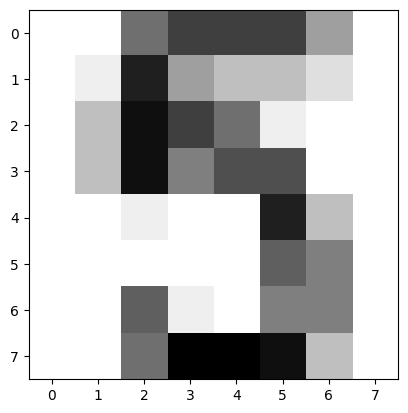

In [ ]:
plt.imshow(digits.images[1010],cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve

<ipython-input-13-6be5d627e500>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


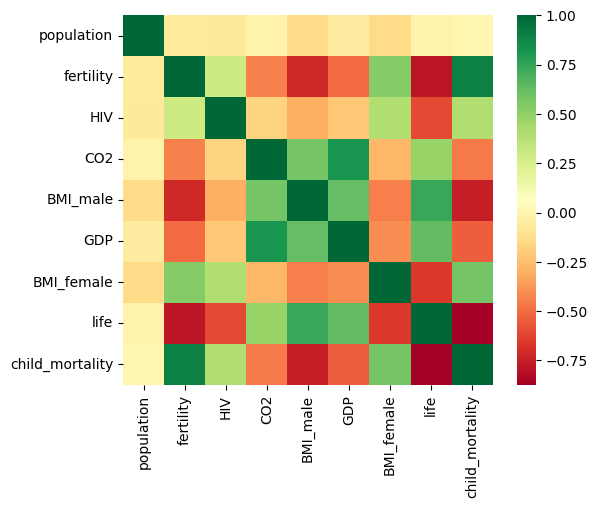

In [ ]:
df = pd.read_csv('gapminder.csv')
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

0.6192442167740035


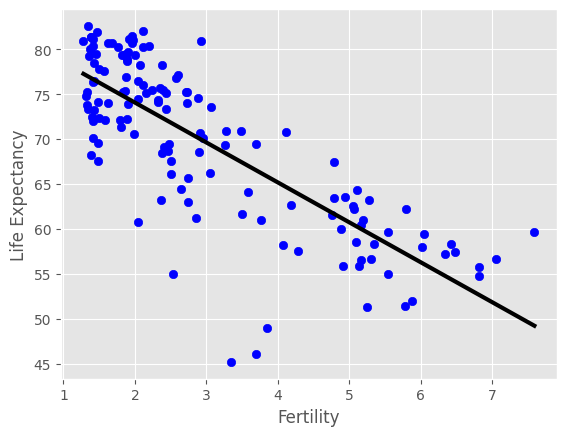

In [ ]:
# modified/added by Jinny
plt.style.use('ggplot')

y = df['life'].values
X = df.drop('life', axis=1)

# Reshape to 1-D
y = y.reshape(-1, 1)
X_fertility = X['fertility'].values.reshape(-1, 1) 

_ = plt.scatter(X['fertility'], y, color='blue')
_ = plt.ylabel('Life Expectancy')
_ = plt.xlabel('Fertility')

# -----------------------
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_life, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred


# Compute and print R^2 and RMSE
print(reg_all.score(features, y_life))

0.8914651485793176


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

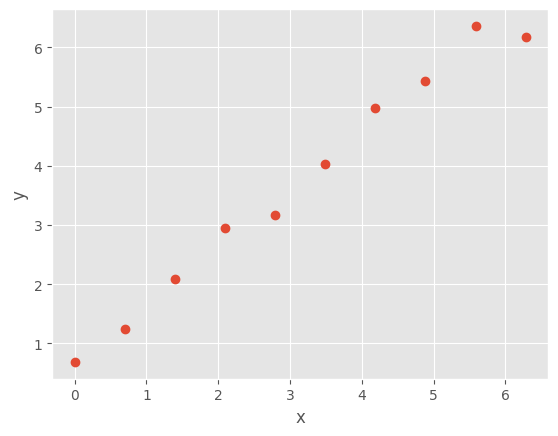

In [ ]:
N =10
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y=m*x + c+ np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import torch 

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x=x
    self.y=y

  def __len__(self):
      return len(self.x)
  

  def __getitem__(self, idx): 
    sample = {
      'feature': torch.tensor ([1, self.x[idx]]), 
      'label': torch.tensor ([self.y[idx]])}
    return sample


In [ ]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  sample = dataset[i]
  print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.3249], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.6252], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.5060], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.1148], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.4458], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([3.9926], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.6896], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.3221], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.2227], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([7.3215], dtype=torch.float64)


In [ ]:
from torch.utils.data import DataLoader
dataset= MyDataset(x, y)
batch_size = 4 
shuffle = True
num_workers = 4
dataloader = DataLoader( dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers )

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import pprint as pp
for i_batch, samples in enumerate (dataloader):
  print('\nbatch# = %s' % i_batch)
  print('samples: ')
  pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 1.3963],
        [1.0000, 2.7925],
        [1.0000, 4.1888],
        [1.0000, 6.2832]], dtype=torch.float64),
 'label': tensor([[2.5060],
        [3.4458],
        [4.6896],
        [7.3215]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 2.0944],
        [1.0000, 3.4907],
        [1.0000, 0.6981],
        [1.0000, 4.8869]], dtype=torch.float64),
 'label': tensor([[3.1148],
        [3.9926],
        [1.6252],
        [5.3221]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 5.5851],
        [1.0000, 0.0000]], dtype=torch.float64),
 'label': tensor([[6.2227],
        [1.3249]], dtype=torch.float64)}


In [ ]:
import torch.nn as nn
import torch.nn. functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim): 
      super (MyModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)
    def forward (self, x):
      out = self.linear(x)
      return out

In [ ]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [ ]:
cost = nn.MSELoss()

In [ ]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(torch.Tensor(x), torch.Tensor(y)) # Convert x and y to tensors
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        features = samples['feature'].float() # Convert features to float
        labels = samples['label'].float() # Convert labels to float
        
        predictions = model(features)
        error = cost(predictions, labels)
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        optimiser.zero_grad()
        error.backward()
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 7.702254295349121
	Batch = 1, Error = 13.808805465698242
	Batch = 2, Error = 4.263489246368408
Epoch = 1
	Batch = 0, Error = 2.072721242904663
	Batch = 1, Error = 1.0039169788360596
	Batch = 2, Error = 0.7218696475028992
Epoch = 2
	Batch = 0, Error = 1.287321925163269
	Batch = 1, Error = 0.05091605335474014
	Batch = 2, Error = 0.5484017729759216
Epoch = 3
	Batch = 0, Error = 0.5535609722137451
	Batch = 1, Error = 0.19042828679084778
	Batch = 2, Error = 1.1805700063705444
Epoch = 4
	Batch = 0, Error = 0.018144484609365463
	Batch = 1, Error = 0.8546347618103027
	Batch = 2, Error = 0.7338478565216064
Epoch = 5
	Batch = 0, Error = 0.8474566340446472
	Batch = 1, Error = 0.2883010804653168
	Batch = 2, Error = 0.11646117269992828
Epoch = 6
	Batch = 0, Error = 0.22584526240825653
	Batch = 1, Error = 0.8822470903396606
	Batch = 2, Error = 0.058477893471717834
Epoch = 7
	Batch = 0, Error = 0.14788007736206055
	Batch = 1, Error = 0.8708349466323853
	Batch = 2, Error 

In [ ]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


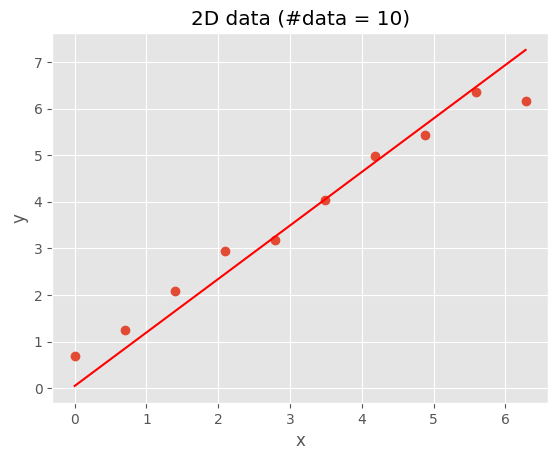

In [ ]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [ ]:
def user_cf(M, metric='cosine'): 
  pred = np.copy (M)
  n_users, n_items= M. shape
  avg_ratings = np.nanmean (M, axis=1)
  sim_users = sim_matrix(M, 'user', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan (M[i, j]):
        pred[i, j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
  return pred


In [ ]:
def item_cf(M, metric='cosine'):
  pred = np.copy (M)
  n_users, n_items = M. shape
  avg_ratings = np.nanmean (M, axis=0)
  sim_items = sim_matrix (M, 'item', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan (M[i, j]):
        pred[i, j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
  return pred

In [ ]:
# Exercise

#1

from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
type(iris.data)

numpy.ndarray

In [ ]:
type(iris.target)

numpy.ndarray

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Assign features to X and labels to y
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
y_train.shape

(120,)

In [ ]:
y_test.shape

(30,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming you have your training and testing data stored in X_train, X_test, y_train, and y_test

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate the regression model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2_score)


Mean Squared Error: 10.546912775288654
Root Mean Squared Error: 3.24760108007259
R^2 Score: 0.8380468731394584


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train,y_train)
     y_pred=knn.predict(X_test)
     scores[k] = metrics.accuracy_score(y_test,y_pred)
     scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

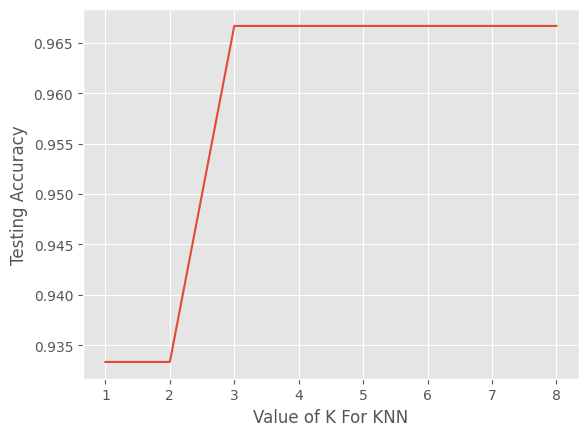

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of K For KNN')
plt.ylabel('Testing Accuracy')

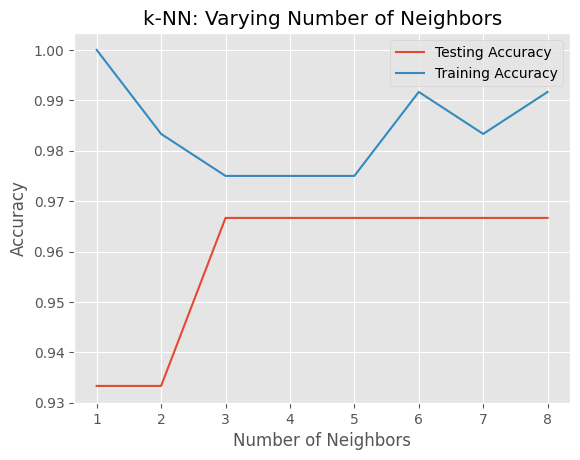

In [ ]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()  

In [ ]:
#2

#a 

#Find list of used genres which is used to category the movies.

path1 = 'movies.csv'
path2 = 'ratings.csv'
path3 = 'users.csv'

In [ ]:
movies = pd.read_csv(path1, encoding="ISO-8859-1")
ratings = pd.read_csv(path2)
users = pd.read_csv(path3)

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
genres_col = movies['genres']

In [ ]:
genres_list = [genre.split('|') if type(genre) == str else [] for genre in genres_col]

In [ ]:
unique_genres = set([genre for sublist in genres_list for genre in sublist])

In [ ]:
genre_list = list(unique_genres)

genre_list

['Documentary',
 'Crime',
 'Musical',
 'Horror',
 'Sci-Fi',
 'Drama',
 'Animation',
 'Romance',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Action',
 "Children's",
 'Thriller',
 'War']

In [ ]:

#Vectorize the relationship between movies and genres and put them into Ij.

unique_genres = sorted(list(set([genre for sublist in genres_list for genre in sublist])))

In [ ]:
Ij = np.zeros((len(movies), len(unique_genres)), dtype=int)
for i, genres in enumerate(genres_list):
    for genre in genres:
        j = unique_genres.index(genre)
        Ij[i, j] = 1

In [ ]:
Ij[:4]

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:

#Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, he/she has the related history with the movies’genres).

merged_df = pd.merge(ratings, movies, on='movie_id')
unique_user_ids = sorted(list(set(merged_df['user_id'])))

In [ ]:
Uj = np.zeros((len(unique_user_ids), len(unique_genres)), dtype=int)
for i, user_id in enumerate(unique_user_ids):
    user_ratings = merged_df.loc[merged_df['user_id'] == user_id]
    user_genre_list = [genre.split('|') if type(genre) == str else [] for genre in user_ratings['genres']]
    user_genre_set = set([genre for sublist in user_genre_list for genre in sublist])
    for j, genre in enumerate(unique_genres):
        if genre in user_genre_set:
            Uj[i, j] = 1

In [ ]:
Uj[:4]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])